# Analalyse de la distribution du vocabulaire

## Imports et dépendances

In [1]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Créer une une liste de stopwords

In [2]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

In [3]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

197 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', 'non'

## Tokeniser

In [4]:
# Récupération du contenu du fichier
path = "../data/all.txt"
limit = 10**8

with open(path) as f:
    text = f.read()[:limit]

In [5]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

24943830 words found


In [6]:
words[:10]

['V', 'I', 'L', 'L', 'E', 'DE', 'BRUXELLES', 'bulletin', 'ires', '8éanas']

## Calculer la taille du vocabulaire

In [7]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

6481844 words kept (154735 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [8]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

[('rue', 64442),
 ('conseil', 46108),
 ('francs', 45304),
 ('ville', 44773),
 ('collège', 36021),
 ('section', 29276),
 ('bruxelles', 27848),
 ('art', 27422),
 ('bourgmestre', 25455),
 ('travaux', 23494)]

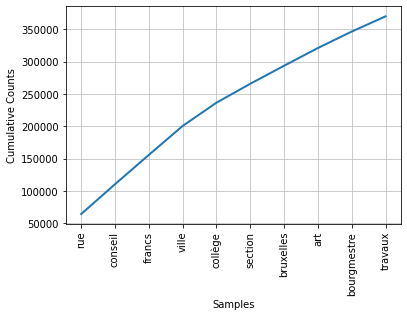

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [9]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

## Détecter les Hapax (mots qui n'apparaissent qu'une fois dans le corpus)

In [11]:
fdist.hapaxes()[:30]

['dîbï',
 'enraisonde',
 'bieniàance',
 'eldeseiànv',
 'dtput',
 'phonnenr',
 'rèumsderb',
 'dow',
 'iraocs',
 'espourvica',
 'imrac',
 'offrantà',
 'differens',
 'philanlropique',
 'advînt',
 'colégataires',
 'cemtimes',
 'noretnbre',
 'lichtendael',
 'apet',
 'propriétéestaujourd',
 'huiquitle',
 'çenè',
 'phospiee',
 'mnll',
 'parferez',
 'portéeà',
 'préférenee',
 'boulavard',
 'surveillerait']

## Trouver les mots les plus longs du corpus

In [12]:
n = 30
sorted(voc, key=len, reverse=True)[:n]

['legouvernementferailluminerleboulevardctlejardinbotanique',
 'droitdesindigentssurlesbalsctdivcrtisscmcntspublics',
 'droitdesindigenlssurlesbalsetdivertissementspublics',
 'construetiondetrottoirspourlecomptedcsparticuliers',
 'constructiondelrotloirspourlecomptedesparticuliers',
 'indemnitédelogementauxpasteursduculteprotestant',
 'accoinplisscmentdcsconditionsprescritesparfart',
 'remboursementdecontributionsparleslocataires',
 'condilionsexccptionnellementfavorablesàla',
 'distributiondediverssecoursparlescomités',
 'iequedoitprésenterralignementdesdiverses',
 'marchandisesdésagréablesarriventqueîque',
 'conslitutiongéologiquedusileoùbruxelles',
 'admirablementavecceluidesintérêtsmoraux',
 'danslesruesderaoinsdelomètresdelargeur',
 'quenouscodservonsdanslescirconstances',
 'lesreprisesenargentduservicearriérés',
 'provenirdeladémolitiondesbàtimentset',
 'lesdépensesgénéralcssesontélevéesàfr',
 'vitrinesituéeducôtédelanouvelleplace',
 'suitedecirconstancesextraordinaires',
 'rendr